<a href="https://colab.research.google.com/github/tbeucler/2023_MLEES_JB/blob/main/ML_EES/IP/W3_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Hurricane Track Analysis

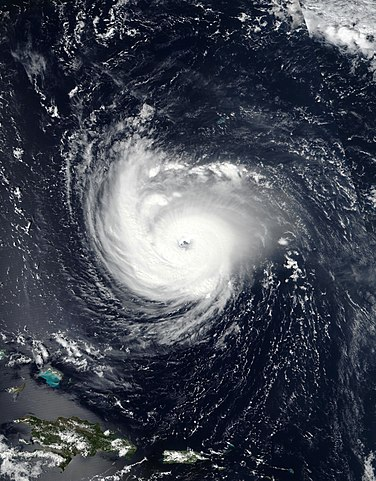

*Can you quickly find out which US states hurricane Florence passed through using `GeoPandas`?*

Image source: [NASA Worldview](https://worldview.earthdata.nasa.gov/)

```{tip} Installing GeoPandas

Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook
```

In [ ]:
#Install the GeoPandas's dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

In [ ]:
#Install the GeoPandas

!pip install --upgrade geopandas

In [ ]:
#Download the data used in this notebook
!gdown 1b1lngOIvuNnZxepbT8RyV3KX1itRky5z

In [ ]:
#Unzip the data used in this notebook
!unzip '/content/data.zip'





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Exercise's Instructions**

* Apply GeoPandas to read in the geospatial data, plot, and analyse the track of Hurricane Florence from August 30th to September 18th 2018.
* Please replace ____ with your codes.

## Q1) import geopandas, pandas

In [ ]:
#Import GeoPandas and other required modules for the notebook
import ____ as gpd
import ____ as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Q2) Read a Shapefile with GeoPandas's read_file function

In [ ]:
# Read data with the geopandas function
path = r"/content/data/hurricane-data/gz_2010_us_040_00_5m.json"
country = gpd.____(path)

## Q3) Have a look at the data, what type of geometries does the data contain?

In [ ]:
# The method to see the first few lines of the datra
country.____()

## Q4) Have a look at the data on a map using GeoPandas's .plot() method. Exclude Alaska and Hawaii by the attribute 'NAME' and Pandas's .isin() method. Specify the figsize to be 30 x 20.

In [ ]:
# Plot the US states (Alaska and Hawaii excluded)
country[country[____].isin([____,____]) == False].____(figsize=(30,20))

In [ ]:
# Read in the hurricane florence data, change the longitude, and have a look at the hurricane florence dataframe
path = r"/content/data/hurricane-data/florence.csv"
florence = pd.read_csv(path)
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence['Long'] = 0 - florence['Long']
florence.head(3)

## Q5) Create a GeoDataFrame from florence DataFrame

In [ ]:
# Create a geodataframe from the hurricane florence dataframe
gdf_florence = gpd.____(florence, geometry=gpd.____(florence.Long, florence.Lat))

In [ ]:
# Have a look at the hurricane geodataframe
gdf_florence.head(2)

## Q6) Plot the US states map (without Alaska, Hawaii) and hurricane florence together

In [ ]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country[____].isin([____,____]) == False].____(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
gdf_florence.____(ax=base, color='darkred', marker="*", markersize=10)

## Q7) What's the coordinate reference system of the data?

In [ ]:
# Check the coordinate reference system of the geodataframe
country.____

## Q8) Which states are passed by the hurricane?

```{hint}
One approach may be plot and see the trajectory of the hurricane on the US map. Other approaches are more than welcome.
```

In [ ]:
# Plot the US states without Alaska and Hawaii
df = country[country[____].isin([____,____]) == False]
ax = df.plot(figsize=(30,20))
#  Annotate the US states with their names
_ = df.apply(lambda x: ax.____(s=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Select the hurricane trajectory points inside the US boundary with the overlay operation
res_intersection = gdf_florence.____(country, how='intersection')
# Plot the hurricane trajectory inside US boundary
____.plot(ax=ax, color='red', marker="*", markersize=25)
